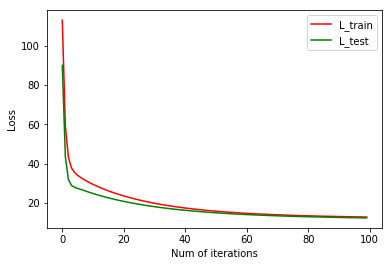

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_svmlight_file

#从文件中导入数据
data = load_svmlight_file("housing_scale.txt")
X, y = data[0], data[1]

#将X转换成numpy类型并为X的最后一列加入偏置项
X=X.dot(np.eye(13))
b=np.ones((506,1))
X=np.column_stack((X,b))

#将y转化为二维的
y=y.reshape(506,1)

#将数据随机按照2：1分成训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

#将参数初始化为全0
w=np.zeros((14,1))
G=np.zeros((14,1))
D=np.zeros((14,1))

#得到各个数据集中的数据个数
m=X.shape[0]
m_train=X_train.shape[0]
m_test=X_test.shape[0]

#设置学习率
alpha=0.1

L_train=np.zeros(100)
L_test=np.zeros(100)

#将循环迭代300次，计算出每一次迭代在训练集和测试集的Loss
for i in range(100):
    for j in range(14):
        G[j]=(((X_train.dot(w)-y_train).T).dot(X_train[:,j]))/m_train
    D=-G
    w=w+alpha*D
    L_train[i]=((X_train.dot(w)-y_train).T).dot(X_train.dot(w)-y_train)/2/m_train
    L_test[i]=((X_test.dot(w)-y_test).T).dot(X_test.dot(w)-y_test)/2/m_test
    
#绘制Loss随迭代次数变化图
x=np.arange(0,100,1)
plt.plot(x,L_train,'r',label='L_train')
plt.plot(x,L_test,'g',label='L_test')
plt.legend(loc='upper right')
plt.xlabel('Num of iterations')
plt.ylabel('Loss')
plt.show()